In [1]:
import sys as sys 
sys.path.append('..')

import numpy as np 
import pandas as pd
from ModelTools import MeanRegression
import plotnine as gg


In [2]:
n = 500
rng = np.random.default_rng(0)
x1 = rng.normal(size=n,loc=0,scale=1)
x2 = rng.normal(size=n,loc=0,scale=1)
y = rng.normal(loc=np.cos(x2),scale=0.5)
df = pd.DataFrame(data={'x1':x1,'x2':x2,'y':y,'ts':pd.date_range(start='2000-01-01',periods=n,freq='min')})

# print(df)

m = MeanRegression(data=df,col_x=['x2'],col_y='y',col_ts='ts',ts_freq='min',exp_model=False)
m.fit(base=['lm'])

100%|██████████| 16/16 [00:04<00:00,  3.48it/s]

Best Model(CV)   : inter_sp_OLS 
Hyperparameters  : inter__degree=1, sp__extrapolation=constant, sp__knots=quantile 
Train Test Split : test_size=0.3, shuffle=False, random_state=0 
Cross Validation : KFold(n_splits=5, random_state=None, shuffle=False) 
 
           R2     MSE     MAE      MBE    MdAE    MAPE    MaxE     SAE     SAPE
-----  ------  ------  ------  -------  ------  ------  ------  ------  -------
Train  0.4408  0.247   0.4     -0       0.3552  2.0588  1.5811  0.2948  10.7846
Test   0.4554  0.2586  0.4107  -0.0176  0.3559  2.1745  1.2214  0.2997  10.2014 
 



Final Model : inter_sp_OLS 
                  R2     MSE     MAE    MBE    MdAE    MAPE    MaxE     SAE     SAPE
------------  ------  ------  ------  -----  ------  ------  ------  ------  -------
Train & Test  0.4442  0.2512  0.4042      0  0.3466   2.062  1.6086  0.2965  10.1945


100%|██████████| 1000/1000 [00:01<00:00, 532.74it/s]


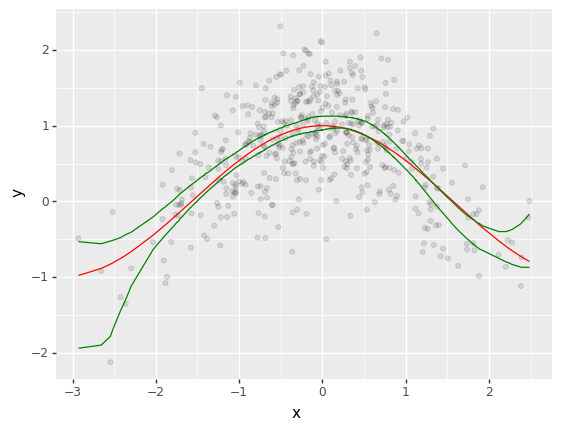

<ggplot: (377608470)>

In [4]:
m.fit_final_model()
x = m.predict_interval(type='confidence',n_bootstrap=1000)
(
    pd.DataFrame(x)
    .assign(x=x2,mean=m.predict(),real=np.cos(x2),y=y)
    .pipe(gg.ggplot)
    +gg.aes(x='x')
    + gg.geom_point(gg.aes(y='y'),alpha=0.1)
    +gg.geom_line(gg.aes(y='real'),color='red')
    +gg.geom_line(gg.aes(y='down'),color='green')
    +gg.geom_line(gg.aes(y='high'),color='green')
)

100%|██████████| 16/16 [00:02<00:00,  7.75it/s]


Best Model(CV)   : inter_sp_OLS 
Hyperparameters  : inter__degree=1, sp__extrapolation=continue, sp__knots=quantile 
Train Test Split : test_size=0.3, shuffle=False, random_state=0 
Cross Validation : KFold(n_splits=5, random_state=None, shuffle=False) 
 
           R2     MSE     MAE     MBE    MdAE    MAPE    MaxE     SAE    SAPE
-----  ------  ------  ------  ------  ------  ------  ------  ------  ------
Train  0.9352  0.0346  0.1513  0.0037  0.1251  0.6448  0.5216  0.1083  2.2602
Test   0.9273  0.0343  0.1414  0.0257  0.1126  0.4902  0.6196  0.1194  1.3942 
 

Final Model : inter_sp_OLS 
                  R2     MSE     MAE    MBE    MdAE    MAPE    MaxE     SAE    SAPE
------------  ------  ------  ------  -----  ------  ------  ------  ------  ------
Train & Test  0.9337  0.0343  0.1468      0  0.1212  0.5369  0.6073  0.1128  1.6013


100%|██████████| 100/100 [00:00<00:00, 326.64it/s]


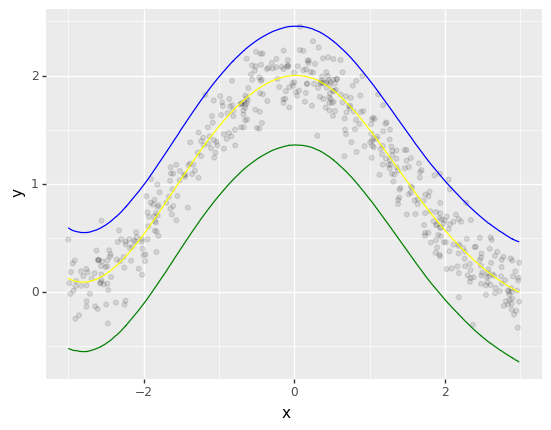

<ggplot: (377515876)>

In [5]:
n = 500
rng = np.random.default_rng(0)
x1 = rng.uniform(-3,3,size=n)
# y = rng.lognormal(mean=x1,sigma=0.1)
y = rng.normal(loc=np.cos(x1)+1,scale=0.2)
# y = rng.normal(loc=np.cos(x1)+1,scale=(x1-min(x1))/np.ptp(x1)+0.01)
df = pd.DataFrame(data={'x1':x1,'y':y})

# print(df)

m = MeanRegression(data=df,col_x=['x1'],col_y='y',exp_model=False)
m.fit(base=['lm'])
m.fit_final_model()

x = m.predict_interval(type='predict',n_bootstrap=100,alpha=0.01)
(
    pd.DataFrame(x)
    .assign(x=x1,m=m.predict(),real=2*x1,y=y)
    .pipe(gg.ggplot)
    +gg.aes(x='x')
    + gg.geom_point(gg.aes(y='y'),alpha=0.1)
    # +gg.geom_line(gg.aes(y='real'),color='red')
    +gg.geom_line(gg.aes(y='m'),color='yellow')
    +gg.geom_line(gg.aes(y='down'),color='green')
    +gg.geom_line(gg.aes(y='high'),color='blue')
)